Matrices are said to "act" on vectors.  As an example, we will have a matrix multiply the vector ${\left[\begin{array}{cc}
   1 \\
   1 \\
  \end{array}\right] }$. To give you an appreciation for what this means, you can manipulate the elements of the following matrix ${\bf{M}}= \left[ {\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array} } \right] $ and visualize the effects on the resulting vector ${\bf{v}} = {\bf{M}}\cdot {\left[\begin{array}{cc}
   1 \\
   1 \\
  \end{array} \right]}$.

In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

# define the original vector 
vec = np.array([1,1])

# define a function that calculates the resulting matrix product (takes arbitrary elements as inputs)
def MatrixProduct(a,b,c,d):
    
    # create a figure with 2 plots
    f, ((ax1, ax2)) = plt.subplots(1,2, sharex=True, sharey=True )
    
    # set x and y limits
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    
    # define matrix 
    mat = np.array([[a,b],[c,d]])
    
    # calculate resulting vector
    resVec = np.dot(mat,vec)
    
    # plot original vector on first axis and resulting vector on second axis
    ax1.quiver(vec[0],vec[1], color='b',angles='xy', scale_units='xy', scale=1)
    ax2.quiver(resVec[0],resVec[1], color='r',angles='xy', scale_units='xy', scale=1)
    
    ax1.set_title('Original Vector')
    ax2.set_title('Resulting Vector')
    
    # show the plot
    plt.show()

# Allows you to run the function in an interactive way where you can change the arguments.
interact(MatrixProduct, a=(-10,10,0.1),b=(-10,10,0.1),c=(-10,10,0.1),d=(-10,10,0.1))




<function __main__.MatrixProduct>

Now that we see that matrices "transform" vectors, we can ask what happens if we have a different starting vector, like ${\left[\begin{array}{cc}
   1 \\
   0 \\
  \end{array} \right]}$.

In [2]:
vec = np.array([1,0])
interact(MatrixProduct, a=(-10,10,0.1),b=(-10,10,0.1),c=(-10,10,0.1),d=(-10,10,0.1))


<function __main__.MatrixProduct>

You may have noticed that in this case changing the elements $a$ and $c$ effect what happens to the vector, but changing $b$ and $d$ have no effect whatsoever on the resulting vector.  The opposite is true for the starting vector ${\left[\begin{array}{cc}
   0 \\
   1 \\
  \end{array} \right]}$ 
  --$b$ and $d$ affect the vector but not $c$ or $d$.

In [3]:
vec = np.array([0,1])
interact(MatrixProduct, a=(-10,10,0.1),b=(-10,10,0.1),c=(-10,10,0.1),d=(-10,10,0.1))

<function __main__.MatrixProduct>

Why should this be the case?  Let's carry the general matrix multiplication ${\bf{v}} = {\bf{M}}\cdot {\left[\begin{array}{cc}
   1 \\
   0 \\
  \end{array} \right]}$ to see why.
  
  ${\bf{v}} = {\bf{M}} \cdot {\left[\begin{array}{cc} 
   1 \\ 
   0 \\ 
  \end{array} \right]} $
  
  ${\bf{v}} = {\left[\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array}  \right]} \cdot 
  {\left[\begin{array}{cc} 
   1 \\ 
   0 \\ 
  \end{array} \right]} =  {\left[\begin{array}{cc}
   a \\
   c \\
  \end{array} \right]}$
  
  From this, it is clear that only the first column of the matrix affects the transformation of the vector (1,0).  
  If we carry out the multiplication on the vector (0,1), the result is (b, d).  Note that the resulting vectors are the columns of our matrix (more on this later). 

So why were all of the elements of the matrix able to affect our original vector (1,1).  Well let's do the multiplication and find out
  ${\bf{v}} = {\left[\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array}  \right]} \cdot 
  {\left[\begin{array}{cc} 
   1 \\ 
   1 \\ 
  \end{array} \right]} =  {\left[\begin{array}{cc}
   a + b\\
   c + d\\
  \end{array} \right]}$
  
  The result is clearly a combination of both columns of our matrix, but so what? Well let's write the multiplication for a general vector ${\bf{c}}= (k1,k2)$ in a more suggestive way. 
  
  ${\bf{v}} = {\left[\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array}  \right]} \cdot 
  {\left[\begin{array}{cc} 
   k1 \\ 
   k2  \\ 
  \end{array} \right]} =  
  {\left[\begin{array}{cc}
   k1\cdot a + k2\cdot b \\
   k1\cdot c + k2\cdot d \\
  \end{array} \right]}
  = k1{\left[\begin{array}{cc}
    a \\
    c \\
  \end{array} \right]} + 
  k2{\left[\begin{array}{cc}
    b \\
    d \\
  \end{array} \right]} $
  
  If we view the columns of our matrix as independent vectors, we see that the matrix multiplications turns out to be a linear combination of these column vectors where the scaling coefficients are given by the components of the vectors we are transforming. So if one of the components of the vector are zero than the contribution of the corresponding column vector of the matrix to the final vector will be the zero vector--ie. has no effect. 
  
  As a side note, by linear combination, we mean that if you take 2 or more things and scale them by constants and then add them together.  The right hand side of the last equation is clearly a linear combination of the column vectors of our matrix.  The "column space" of a matrix in linear algebra is a powerful notion that can tell us alot of information about a linear system.  Here we will go over linear dependence and talk about the dimensionality of the column space.  
  
Consider the matrix 

${\left[\begin{array}{cc}
   1 & 2.5 \\
   3 & 0.5 \\
  \end{array}  \right]}$
  
The column vectors are (1,3) and (2.5, 0.5).  Multiplying this matrix by an arbitrary vector, (a,b), will obviously yield the vector given by

  $a{\left[\begin{array}{cc}
    1 \\
    3 \\
  \end{array} \right]} + 
  b{\left[\begin{array}{cc}
    2.5 \\
    0.5 \\
  \end{array} \right]} $
  
  What does this mean pictorially? Well, let's plot a grid of lines in the directions of our vectors such that when we add integers times our vectors together we hit intersections. 

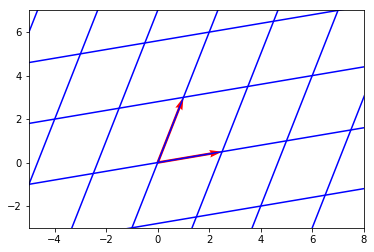

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#basis vectors 
v1 =np.array([1,3])
v2 = np.array([2.5,0.5])

# create figure and axes object
fig, ax = plt.subplots(1,1)
ax.set_xlim(-5, 8)
ax.set_ylim(-3,7)
ax.quiver([v1[0]],[v1[1]],color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver([v2[0]],[v2[1]],color='r',angles='xy', scale_units='xy', scale=1)


t = np.linspace(-15,15, 100)
a = np.arange(-10,10)
for num in a:
    x=[]
    y=[]
    for tval in t:
        vec = num*v1+tval*v2
        x.append(vec[0])
        y.append(vec[1])
    ax.plot(x, y, color = 'blue')
    
for num in a:
    x=[]
    y=[]
    for tval in t:
        vec = num*v2+tval*v1
        x.append(vec[0])
        y.append(vec[1])
    ax.plot(x, y, color = 'blue')
    
plt.show()

The grid presents a nice way of showing the action of our matrix on an arbitrary vector.  For example, we know that the following matrix multiplication should work out as follows:

${\left[\begin{array}{cc}
   1 & 2.5 \\
   3 & 0.5 \\
  \end{array}  \right]}\cdot {\left[\begin{array}{cc}
   1.3  \\
   2.2 \\
  \end{array}  \right]}= 1.3{\left[\begin{array}{cc}
    1 \\
    3 \\
  \end{array} \right]} + 
  2.2{\left[\begin{array}{cc}
    2.5 \\
    0.5 \\
  \end{array} \right]}$
 
 Pictorially, we scale the vectors by their corresponding coefficients and then add them together to obtain the result of the matrix multiplication.  
 
 
 

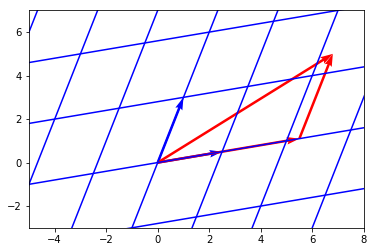

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#basis vectors 
v1 =np.array([1,3])
v2 = np.array([2.5,0.5])

# create figure and axes object
fig, ax = plt.subplots(1,1)
ax.set_xlim(-5, 8)
ax.set_ylim(-3,7)
ax.quiver([v1[0]],[v1[1]],color='b',angles='xy', scale_units='xy', scale=1)
ax.quiver([v2[0]],[v2[1]],color='b',angles='xy', scale_units='xy', scale=1)


t = np.linspace(-15,15, 100)
a = np.arange(-10,10)
for num in a:
    x=[]
    y=[]
    for tval in t:
        vec = num*v1+tval*v2
        x.append(vec[0])
        y.append(vec[1])
    ax.plot(x, y, color = 'blue')
    
for num in a:
    x=[]
    y=[]
    for tval in t:
        vec = num*v2+tval*v1
        x.append(vec[0])
        y.append(vec[1])
    ax.plot(x, y, color = 'blue')
    
ax.quiver([2.2* v2[0]],[2.2*v2[1]],[1.3*v1[0]],[1.3*v1[1]],color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver([2.2* v2[0]],[2.2*v2[1]],color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver([2.2* v2[0]+1.3*v1[0]],[2.2*v2[1]+1.3*v1[1]],color='r',angles='xy', scale_units='xy', scale=1)
plt.show()

It should be clear from this picture that we can construct any vector in that exists in this 2-d space by carefully choosing the components of the vector on which our matrix is acting. Will this always be the case?

If no, under what circumstances will we fail to be able to recover any vector that we want from our multiplication?

The notion of being able to construct grids in this way can be expanded to any number of dimensions, though it is impossible to fully visualize after three dimensions.  For a 3x3 matrix, our grid exits in the 3-d cartesian space and the vectors form a grid consisting of parallelpipeds instead of parallelograms. 

